In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from collections import Counter

# Exploratory Data Analyses - EDA - Intercement data

## Reading the dataset

In [2]:
xls = pd.ExcelFile(
    "../../../data/raw/Intercement/estudo.xlsm", engine="openpyxl"
)
df = pd.read_excel(xls, "dados", parse_dates=["Data"])

df_2018_2019 = pd.read_excel(
    "../../../data/raw/Intercement/Dados_CAJ_2018_19.xlsx",
    engine="openpyxl",
    parse_dates=["Data"],
)

## Initial Preprocessing

In [3]:
# 2008-2017
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df[~df.isna().all(axis=1)]
df = df.rename({"G75�": "G75", "G44�": "G44"}, axis=1)

# 2018-2019
df_2018_2019 = df_2018_2019.rename({"G75�": "G75", "G44�": "G44"}, axis=1)
df = pd.concat([df, df_2018_2019]).reset_index(drop=True)

df = df[df["COD_PROD"] ==  "CPIIF32"].reset_index(drop=True)

## Exploratory data Analysis

In [4]:
df.shape

(3780, 40)

In [5]:
df.head()

,Data,RIC,RIC_OBS,Nat,Nat1,Lp,Ec,Lc,RIE,RIE_OBS,...,MGO,SIO2,FE2O3,SO3,NA2O,P2O5,EXP,RC1,RC91,CO2
0,2008-01-02,3323A,NaN,AC,NaN,-,CAJ,-,3323A,NaN,...,6.17,17.29,4.34,2.75,0.08,0.85,NaN,NaN,NaN,NaN
1,2008-01-02,3324A,NaN,AC,NaN,-,CAJ,-,3324A,NaN,...,6.04,18.35,4.22,2.86,0.08,0.75,NaN,NaN,NaN,NaN
2,2008-01-03,3304A,NaN,AC,NaN,-,CAJ,-,3304A,NaN,...,6.20,18.42,4.37,2.91,0.08,0.76,NaN,NaN,NaN,NaN
3,2008-01-03,3302A,NaN,AC,NaN,-,CAJ,-,3302A,NaN,...,6.26,17.44,4.56,2.82,0.08,0.89,NaN,NaN,NaN,NaN
4,2008-01-04,3284A,NaN,VM,NaN,-,CAJ,-,3284A,NaN,...,5.33,17.60,2.31,3.25,NaN,0.09,0.0,NaN,NaN,NaN


In [6]:
df.tail()

,Data,RIC,RIC_OBS,Nat,Nat1,Lp,Ec,Lc,RIE,RIE_OBS,...,MGO,SIO2,FE2O3,SO3,NA2O,P2O5,EXP,RC1,RC91,CO2
3775,2019-07-19,8121B,NaN,AC,NaN,-,CAJ,-,8121B,NaN,...,5.86,14.13,3.49,2.91,NaN,0.86,NaN,NaN,NaN,NaN
3776,2019-07-23,8122B,NaN,AC,NaN,-,CAJ,-,8122B,NaN,...,5.79,15.13,3.56,2.85,NaN,0.85,NaN,NaN,NaN,NaN
3777,2019-07-25,8123B,NaN,AC,NaN,-,CAJ,-,8123B,NaN,...,5.45,15.09,3.76,2.84,NaN,0.85,NaN,NaN,NaN,NaN
3778,2019-07-27,8148B,NaN,AC,NaN,-,CAJ,-,8148B,NaN,...,5.48,15.47,3.91,2.76,NaN,0.89,NaN,NaN,44.4,NaN
3779,2019-07-30,8149B,NaN,AC,NaN,-,CAJ,-,8149B,NaN,...,5.82,14.65,2.92,3.11,NaN,0.80,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3780 entries, 0 to 3779
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          3780 non-null   datetime64[ns]
 1   RIC           3780 non-null   object        
 2   RIC_OBS       0 non-null      float64       
 3   Nat           3780 non-null   object        
 4   Nat1          20 non-null     object        
 5   Lp            3780 non-null   object        
 6   Ec            3780 non-null   object        
 7   Lc            3780 non-null   object        
 8   RIE           3780 non-null   object        
 9   RIE_OBS       0 non-null      float64       
 10  Rept          0 non-null      float64       
 11  COD_MN        3780 non-null   object        
 12  COD_ENT       3780 non-null   object        
 13  COD_PROD      3780 non-null   object        
 14  COD_VAR_PROD  3764 non-null   object        
 15  AGP           3764 non-null   float64 

<h2>1. Structure Investigation</h2>

In [8]:
df.dtypes.value_counts()

float64           28
object            11
datetime64[ns]     1
dtype: int64

<h3>1.1 Structure of numerical features</h3>

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RIC_OBS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RIE_OBS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rept,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGP,3764.0,29.292906,0.935229,20.20,28.8000,29.400,29.8000,32.20
IP,3765.0,218.823373,27.758961,110.00,200.0000,220.000,240.0000,330.00
FP,3761.0,313.989896,41.186697,165.00,285.0000,315.000,345.0000,495.00
G75,3767.0,0.111580,0.195878,0.00,0.1000,0.100,0.1000,7.83
G44,3664.0,1.105914,0.803718,0.03,0.6000,1.000,1.2000,15.80
MVOL,3137.0,3.067294,0.080984,0.90,3.0300,3.070,3.1100,3.19
SBL,3776.0,4778.993644,473.827413,3350.00,4410.0000,4780.000,5180.0000,6300.00


<h3>1.2 Structure of Non-Numeric features</h3>

In [10]:
df.describe(exclude='number').T

/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last
Data,3780,2614,2008-06-16 00:00:00,6,2008-01-02,2019-12-03
RIC,3780,3780,6899A,1,NaT,NaT
Nat,3780,6,AC,3672,NaT,NaT
Nat1,20,1,AB,20,NaT,NaT
Lp,3780,4,-,3647,NaT,NaT
Ec,3780,1,CAJ,3780,NaT,NaT
Lc,3780,5,-,3641,NaT,NaT
RIE,3780,3780,6899A,1,NaT,NaT
COD_MN,3780,1,CEMBRCAJ,3780,NaT,NaT
COD_ENT,3780,1,CAJ,3780,NaT,NaT


In [11]:
df["COD_PROD"].unique()

array(['CPIIF32'], dtype=object)

In [12]:
dates = df["Data"]

In [13]:
print(dates.min())
print(dates.max())

2008-01-02 00:00:00
2019-12-03 00:00:00


In [14]:
dates

0      2008-01-02
1      2008-01-02
2      2008-01-03
3      2008-01-03
4      2008-01-04
          ...    
3775   2019-07-19
3776   2019-07-23
3777   2019-07-25
3778   2019-07-27
3779   2019-07-30
Name: Data, Length: 3780, dtype: datetime64[ns]

In [15]:
for column in df.dtypes[df.dtypes == object].keys():
    print(column, df[column].unique())


RIC ['3323A' '3324A' '3304A' ... '8123B' '8148B' '8149B']
Nat ['AC' 'VM' 'FA' 'EC' 'KP' 'RM']
Nat1 [nan 'AB']
Lp ['-' '--' 'CIP' 1]
Ec ['CAJ']
Lc ['-' '--' 1 'AF1' 'CIP']
RIE ['3323A' '3324A' '3304A' ... '8123B' '8148B' '8149B']
COD_MN ['CEMBRCAJ']
COD_ENT ['CAJ']
COD_PROD ['CPIIF32']
COD_VAR_PROD ['GRA' 'SAC' nan 'ESC']


<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<AxesSubplot:title={'center':'Unique Values per feature'}>

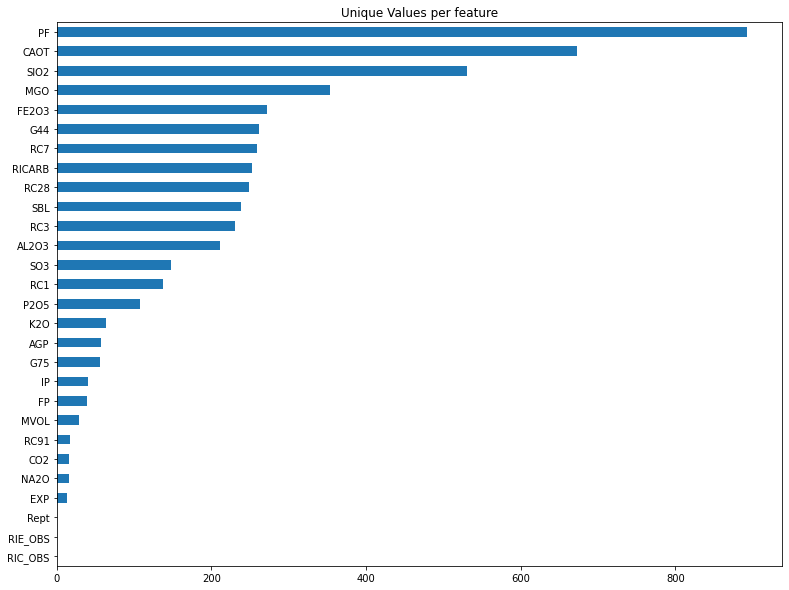

In [16]:
unique_values = df.select_dtypes(include='number').nunique().sort_values()

unique_values.plot.barh(logy=False, figsize=(13, 10), title='Unique Values per feature')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Nat1'),
  Text(1, 0, 'Ec'),
  Text(2, 0, 'COD_MN'),
  Text(3, 0, 'COD_ENT'),
  Text(4, 0, 'COD_PROD'),
  Text(5, 0, 'COD_VAR_PROD'),
  Text(6, 0, 'Lp'),
  Text(7, 0, 'Lc'),
  Text(8, 0, 'Nat'),
  Text(9, 0, 'Data'),
  Text(10, 0, 'RIC'),
  Text(11, 0, 'RIE')])

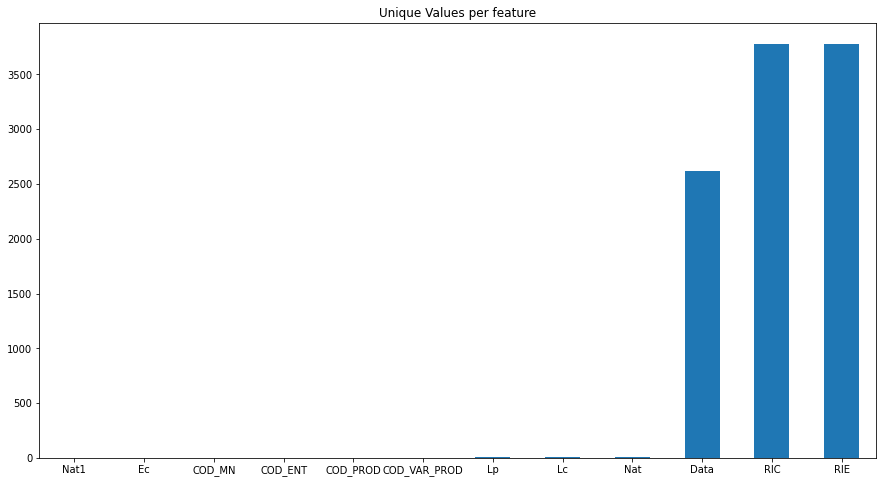

In [17]:
unique_values = df.select_dtypes(exclude='number').nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title='Unique Values per feature')

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [18]:
print("There are", df.isna().any().sum(), "variables with missing values from a total of", df.shape[1])

There are 29 variables with missing values from a total of 40


In [19]:
df.isna().any().sort_values()

Data            False
COD_PROD        False
COD_ENT         False
RC3             False
RIE             False
Lc              False
COD_MN          False
Lp              False
Nat             False
RIC             False
Ec              False
PF               True
AL2O3            True
CAOT             True
K2O              True
MGO              True
FE2O3            True
SO3              True
RC1              True
NA2O             True
P2O5             True
EXP              True
SIO2             True
RICARB           True
G44              True
RC7              True
SBL              True
MVOL             True
RC91             True
G75              True
FP               True
IP               True
AGP              True
COD_VAR_PROD     True
Rept             True
RIE_OBS          True
Nat1             True
RIC_OBS          True
RC28             True
CO2              True
dtype: bool

In [20]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

,Missing (count)
RIC_OBS,3780
RIE_OBS,3780
Rept,3780
CO2,3764
RC91,3763
Nat1,3760
EXP,2950
NA2O,2813
RC1,2381
MVOL,643


In [21]:
print("There are a total of ", df.isna().sum().sum(), "missing values.")

There are a total of  32831 missing values.


/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of quantity of missing values')

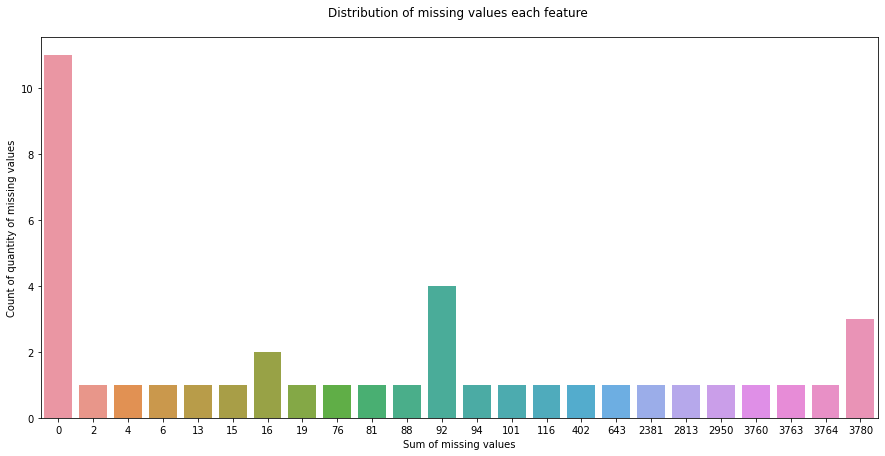

In [22]:
plt.figure(figsize=(15, 7))
sns.countplot(df.isna().sum())
plt.title("Distribution of missing values each feature \n")
plt.xlabel("Sum of missing values")
plt.ylabel("Count of quantity of missing values")

<BarContainer object of 40 artists>

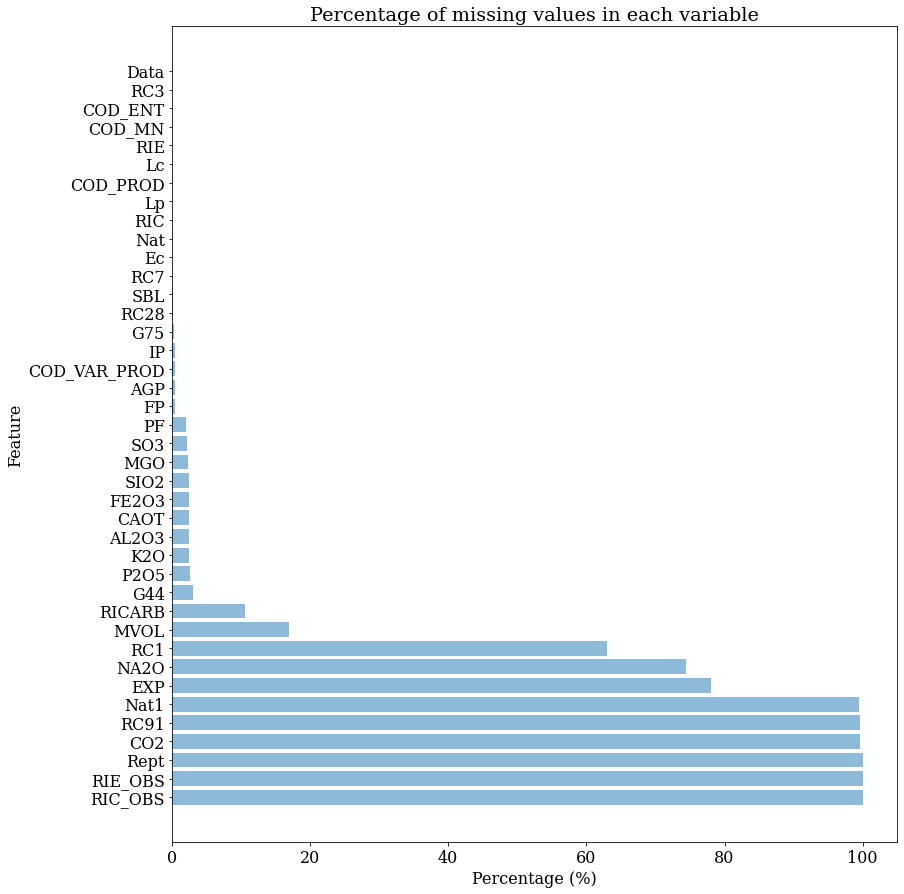

In [23]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [24]:
(df.isna().sum()/df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
RIC_OBS,100.000000
RIE_OBS,100.000000
Rept,100.000000
CO2,99.576720
RC91,99.550265
Nat1,99.470899
EXP,78.042328
NA2O,74.417989
RC1,62.989418
MVOL,17.010582


<BarContainer object of 40 artists>

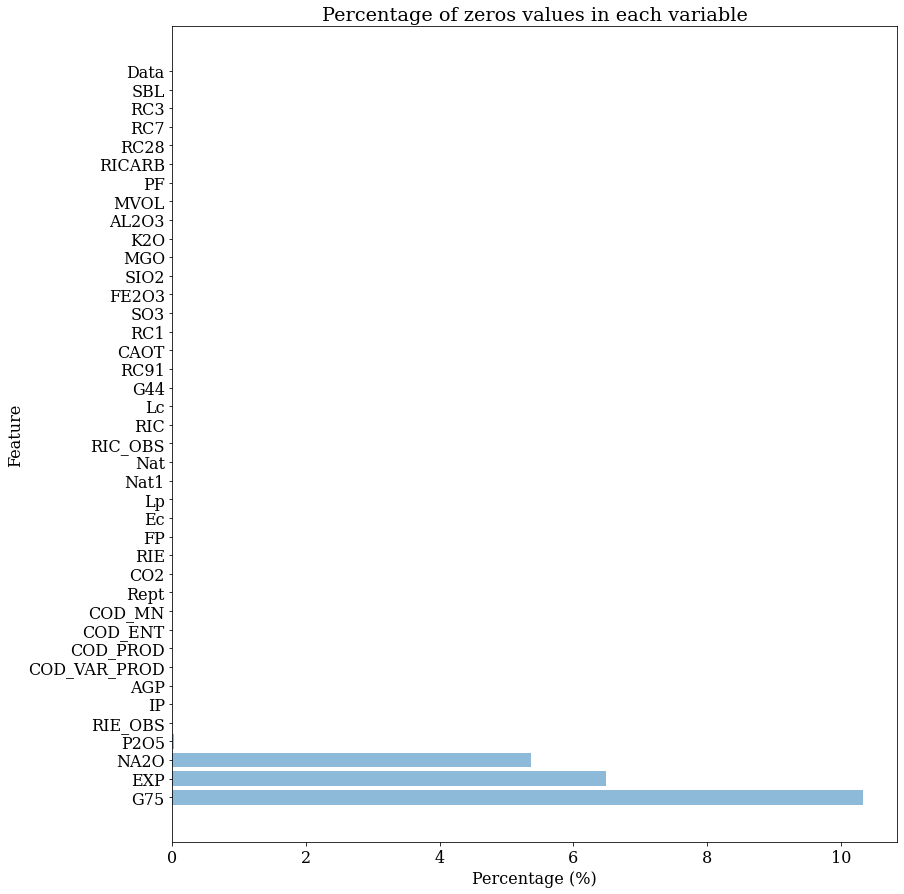

In [25]:
zeros_perc = (df == 0).sum(axis=0) / df.shape[0] * 100
zeros_perc = zeros_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of zeros values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(zeros_perc.index, zeros_perc.round(2), alpha=0.5)

<h3>2.4. Duplicates</h3>

In [26]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


In [27]:
n_duplicates = (
    df.drop(["Data"], axis=1)
    .duplicated()
    .sum()
)
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

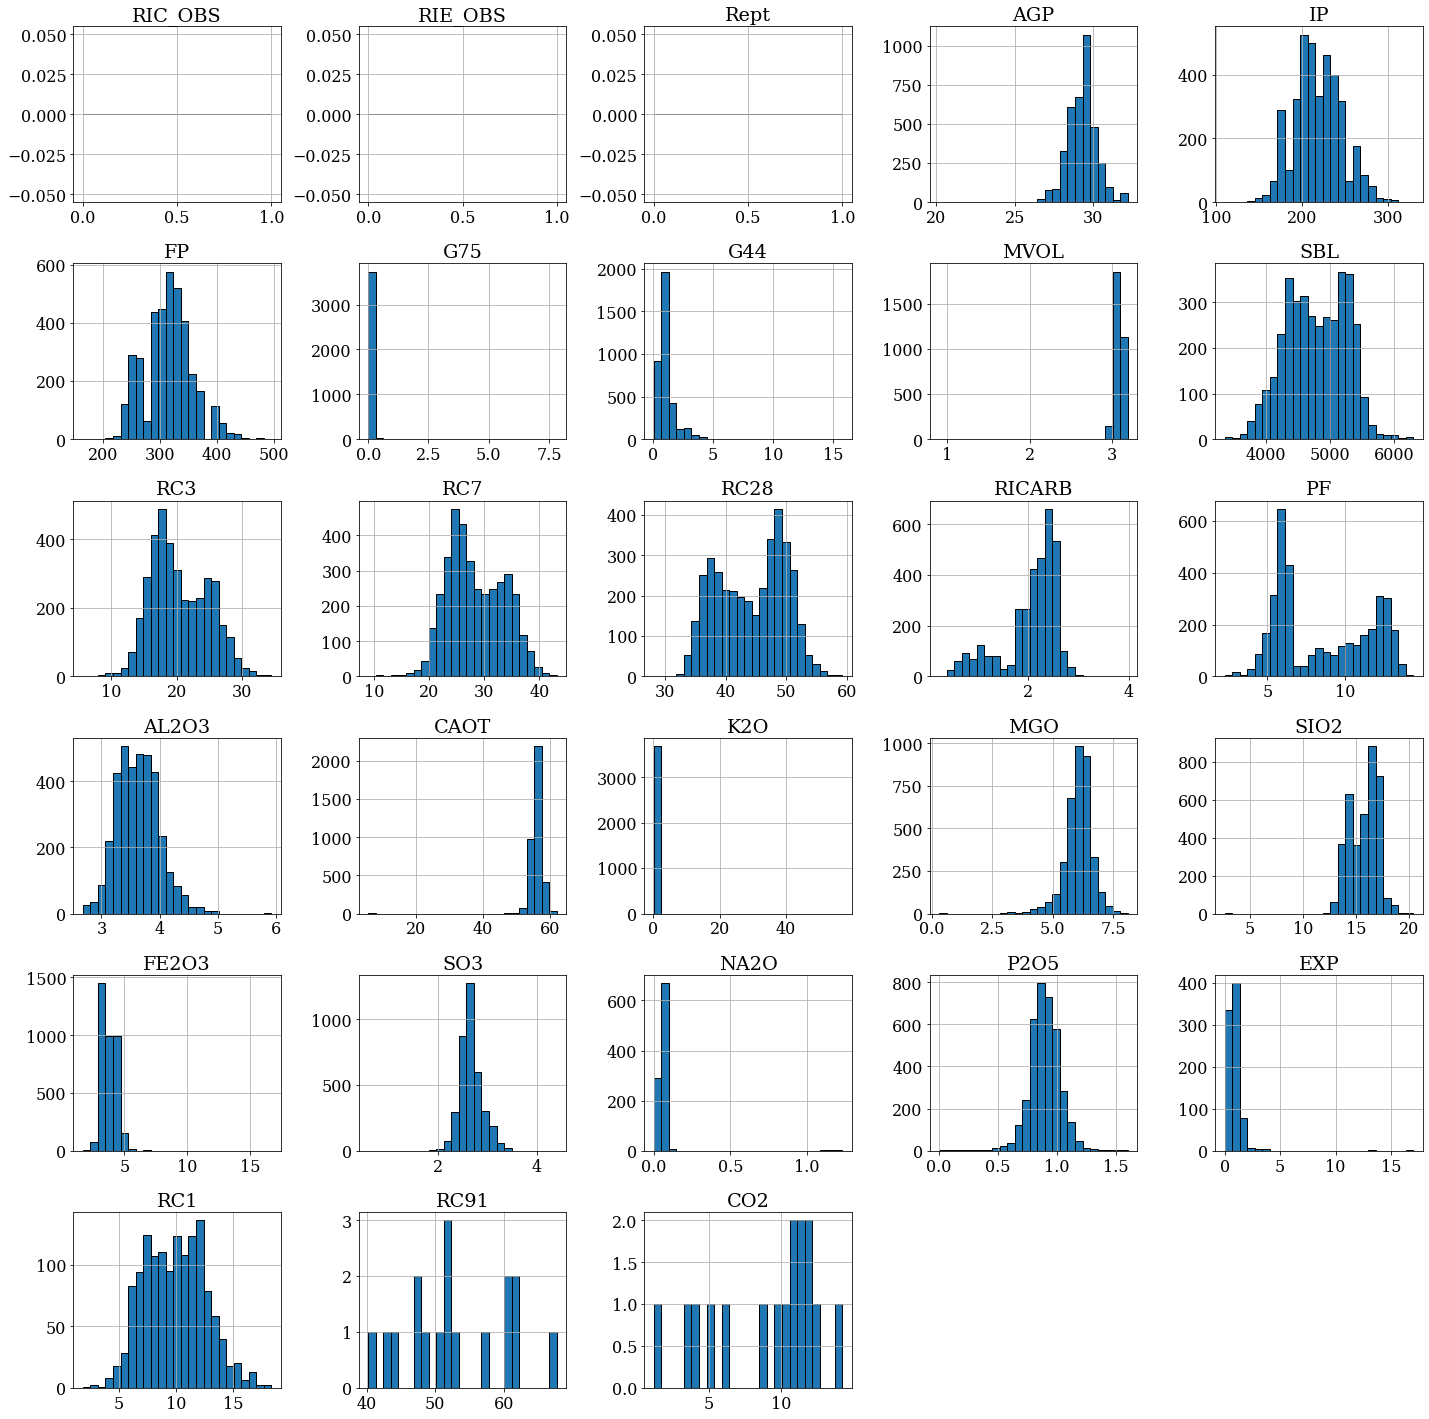

In [28]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

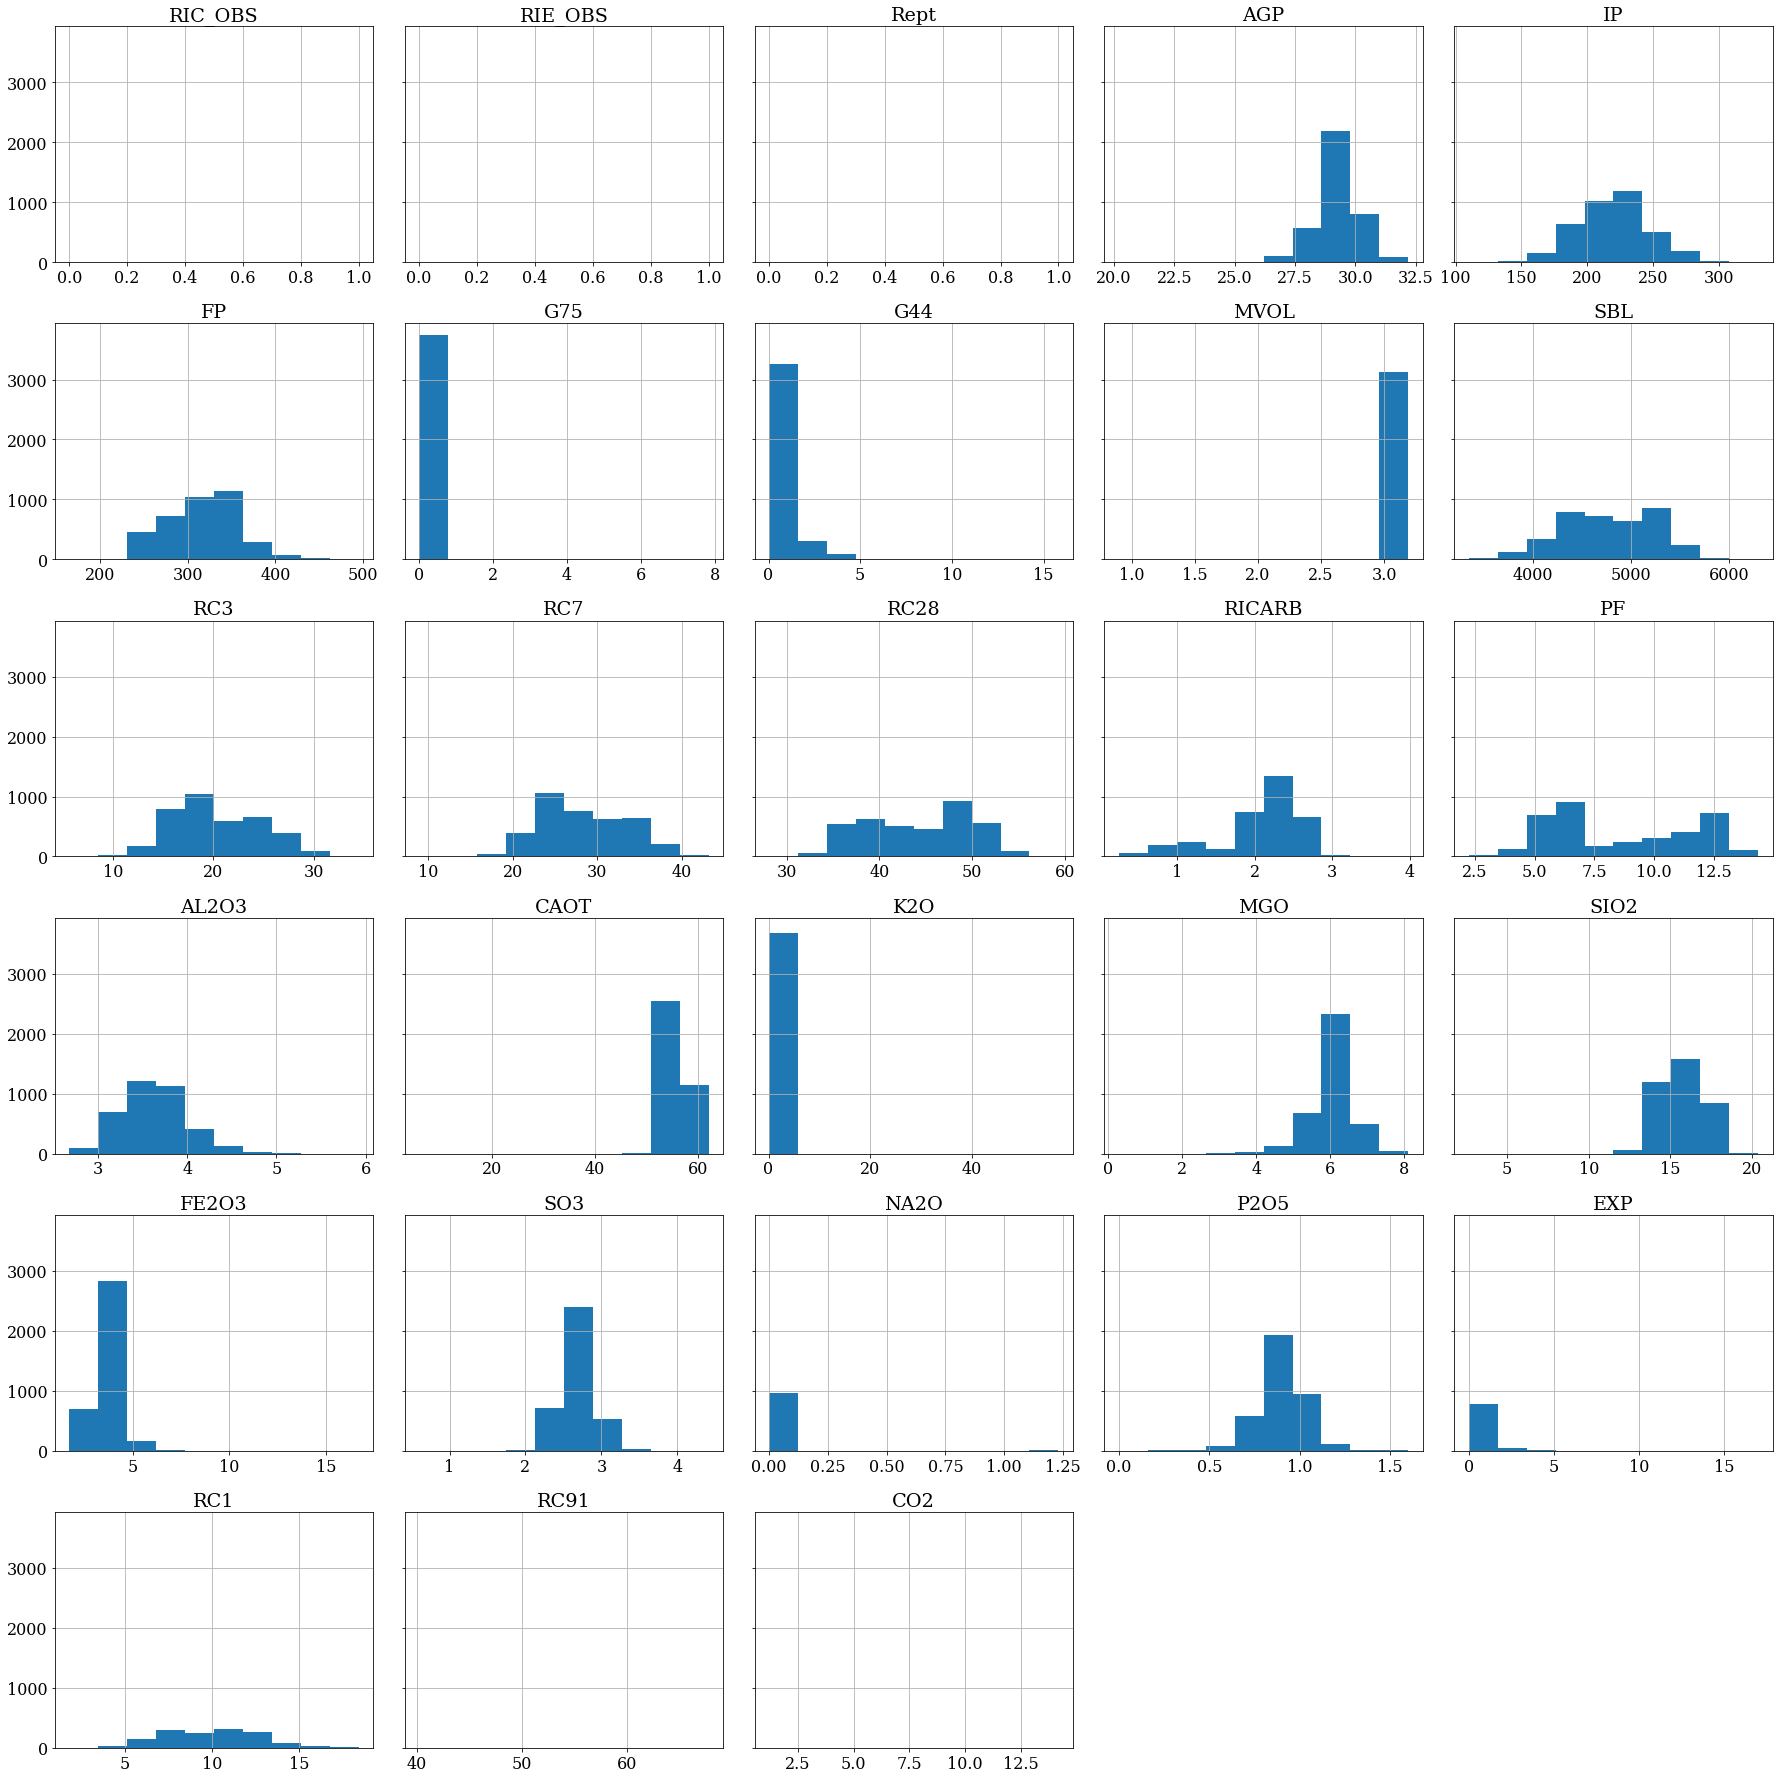

In [29]:
df.select_dtypes(include='float64').hist(figsize=(25, 25), sharey=True);
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

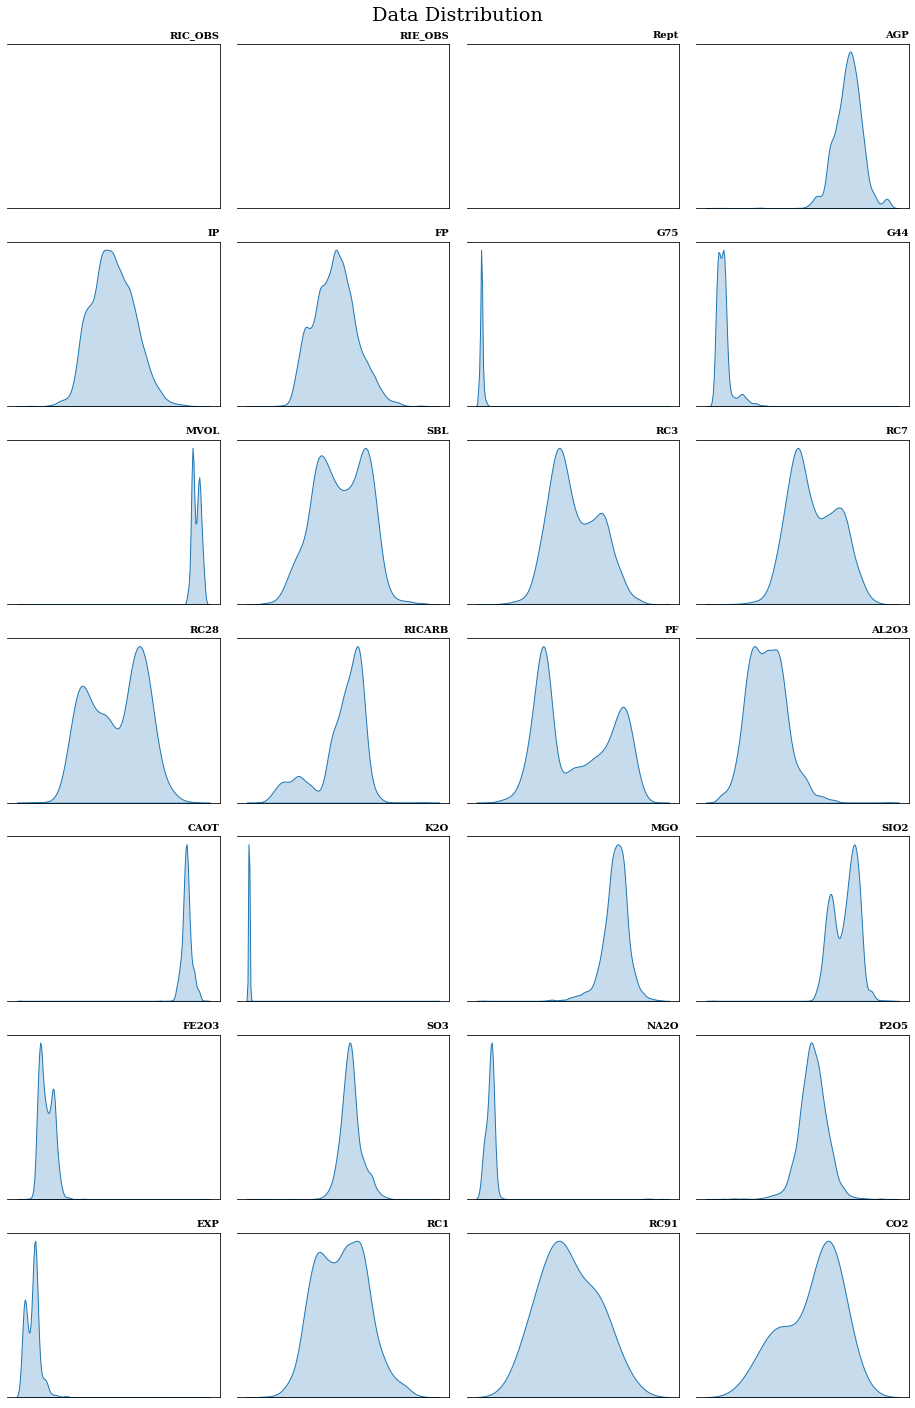

In [30]:
fig, axes = plt.subplots(7, 4, figsize=(13, 20))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

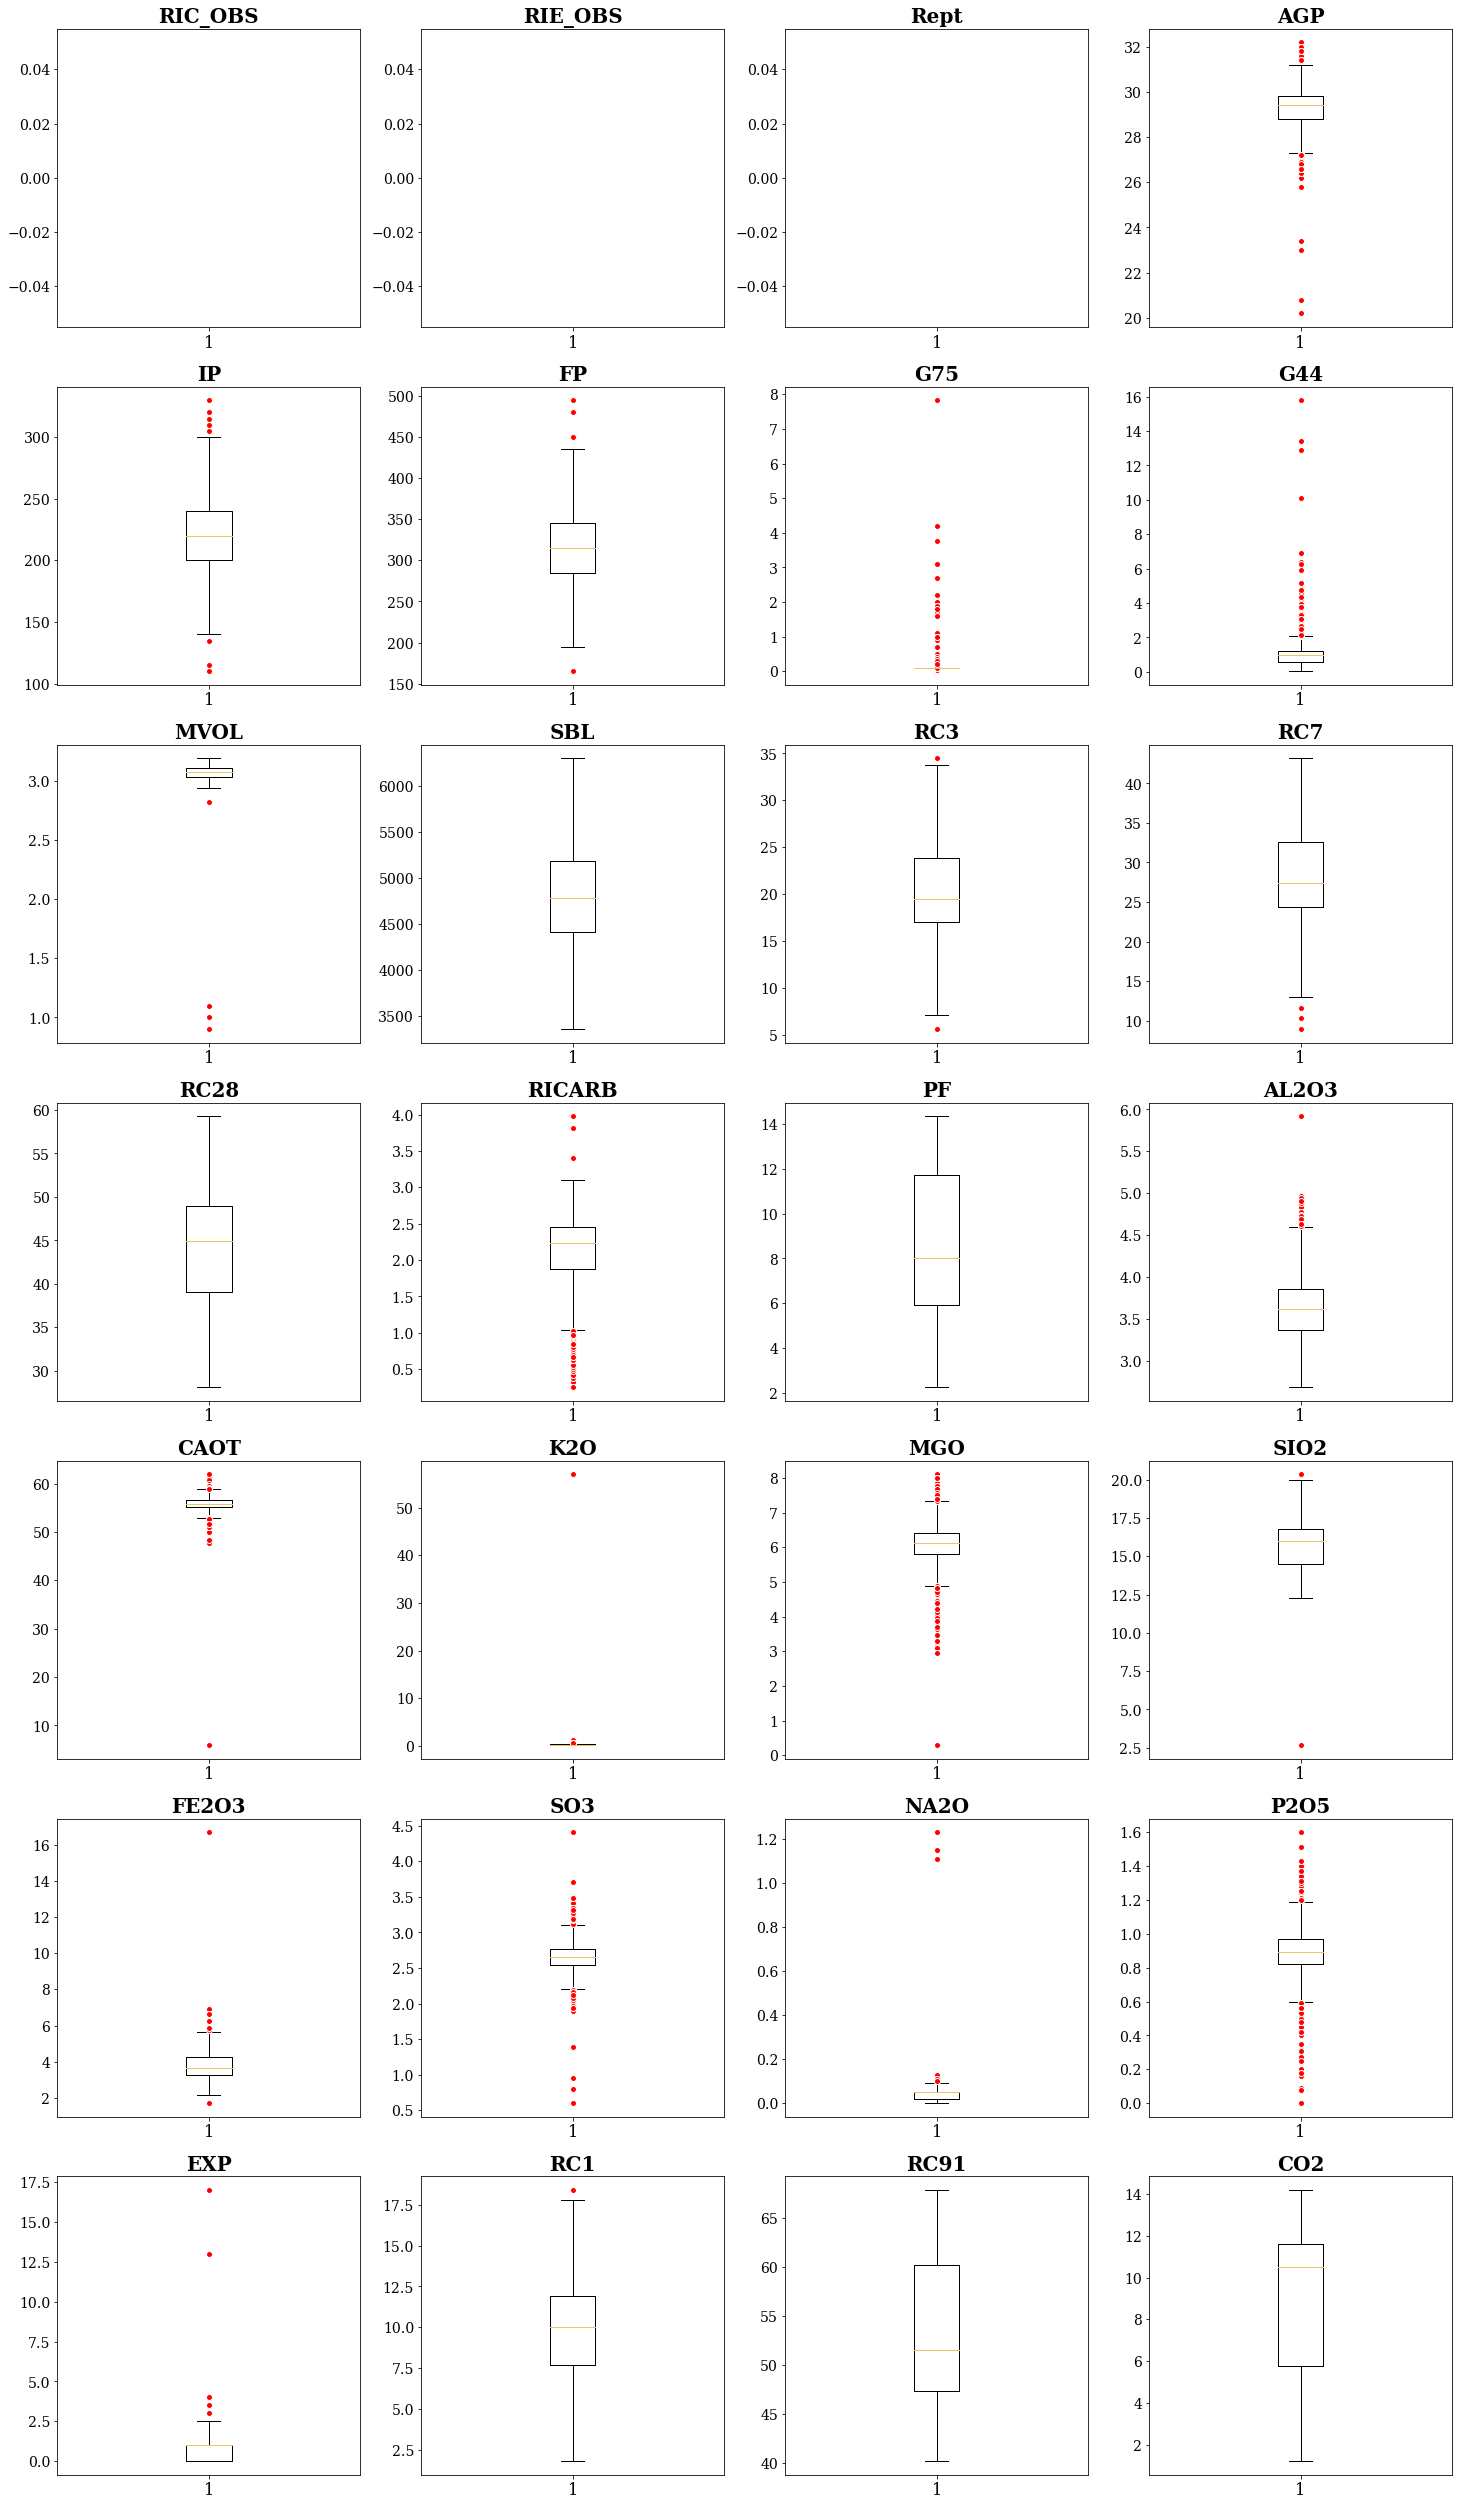

In [31]:
#Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include='float64').columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(7, 4, figsize=(25,45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:,i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

<h3>3.3. Feature Relationship</h3>

<AxesSubplot:>

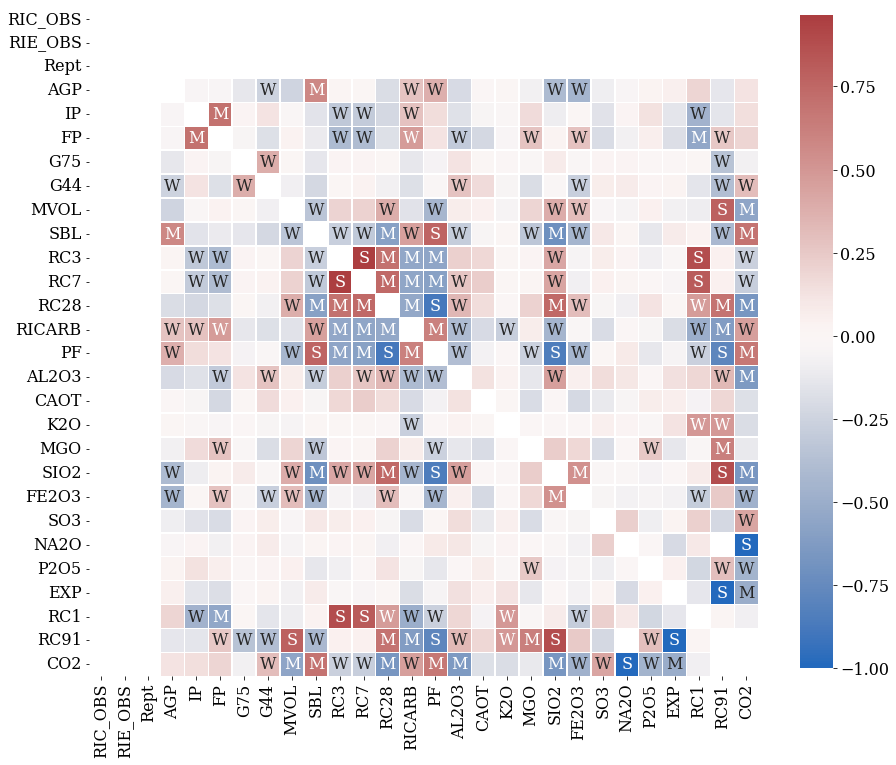

In [32]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(
    np.abs(df_corr) >= 0.75,
    "S",
    np.where(np.abs(df_corr) > 0.5, "M", np.where(np.abs(df_corr) > 0.25, "W", "")),
)

# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

<AxesSubplot:>

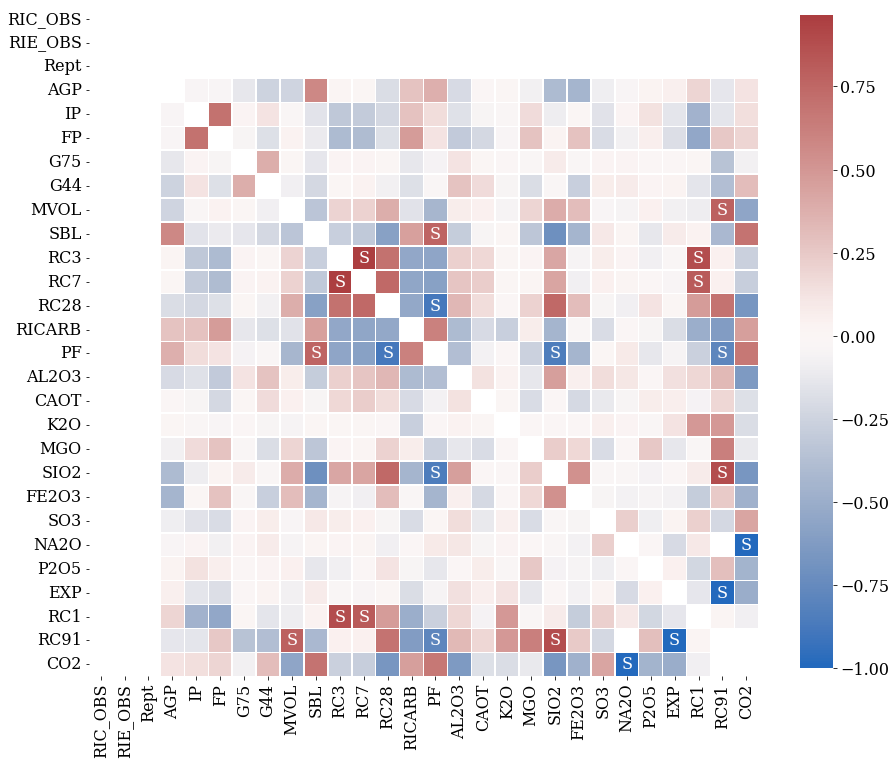

In [33]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr) >= 0.75, "S", "")


# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

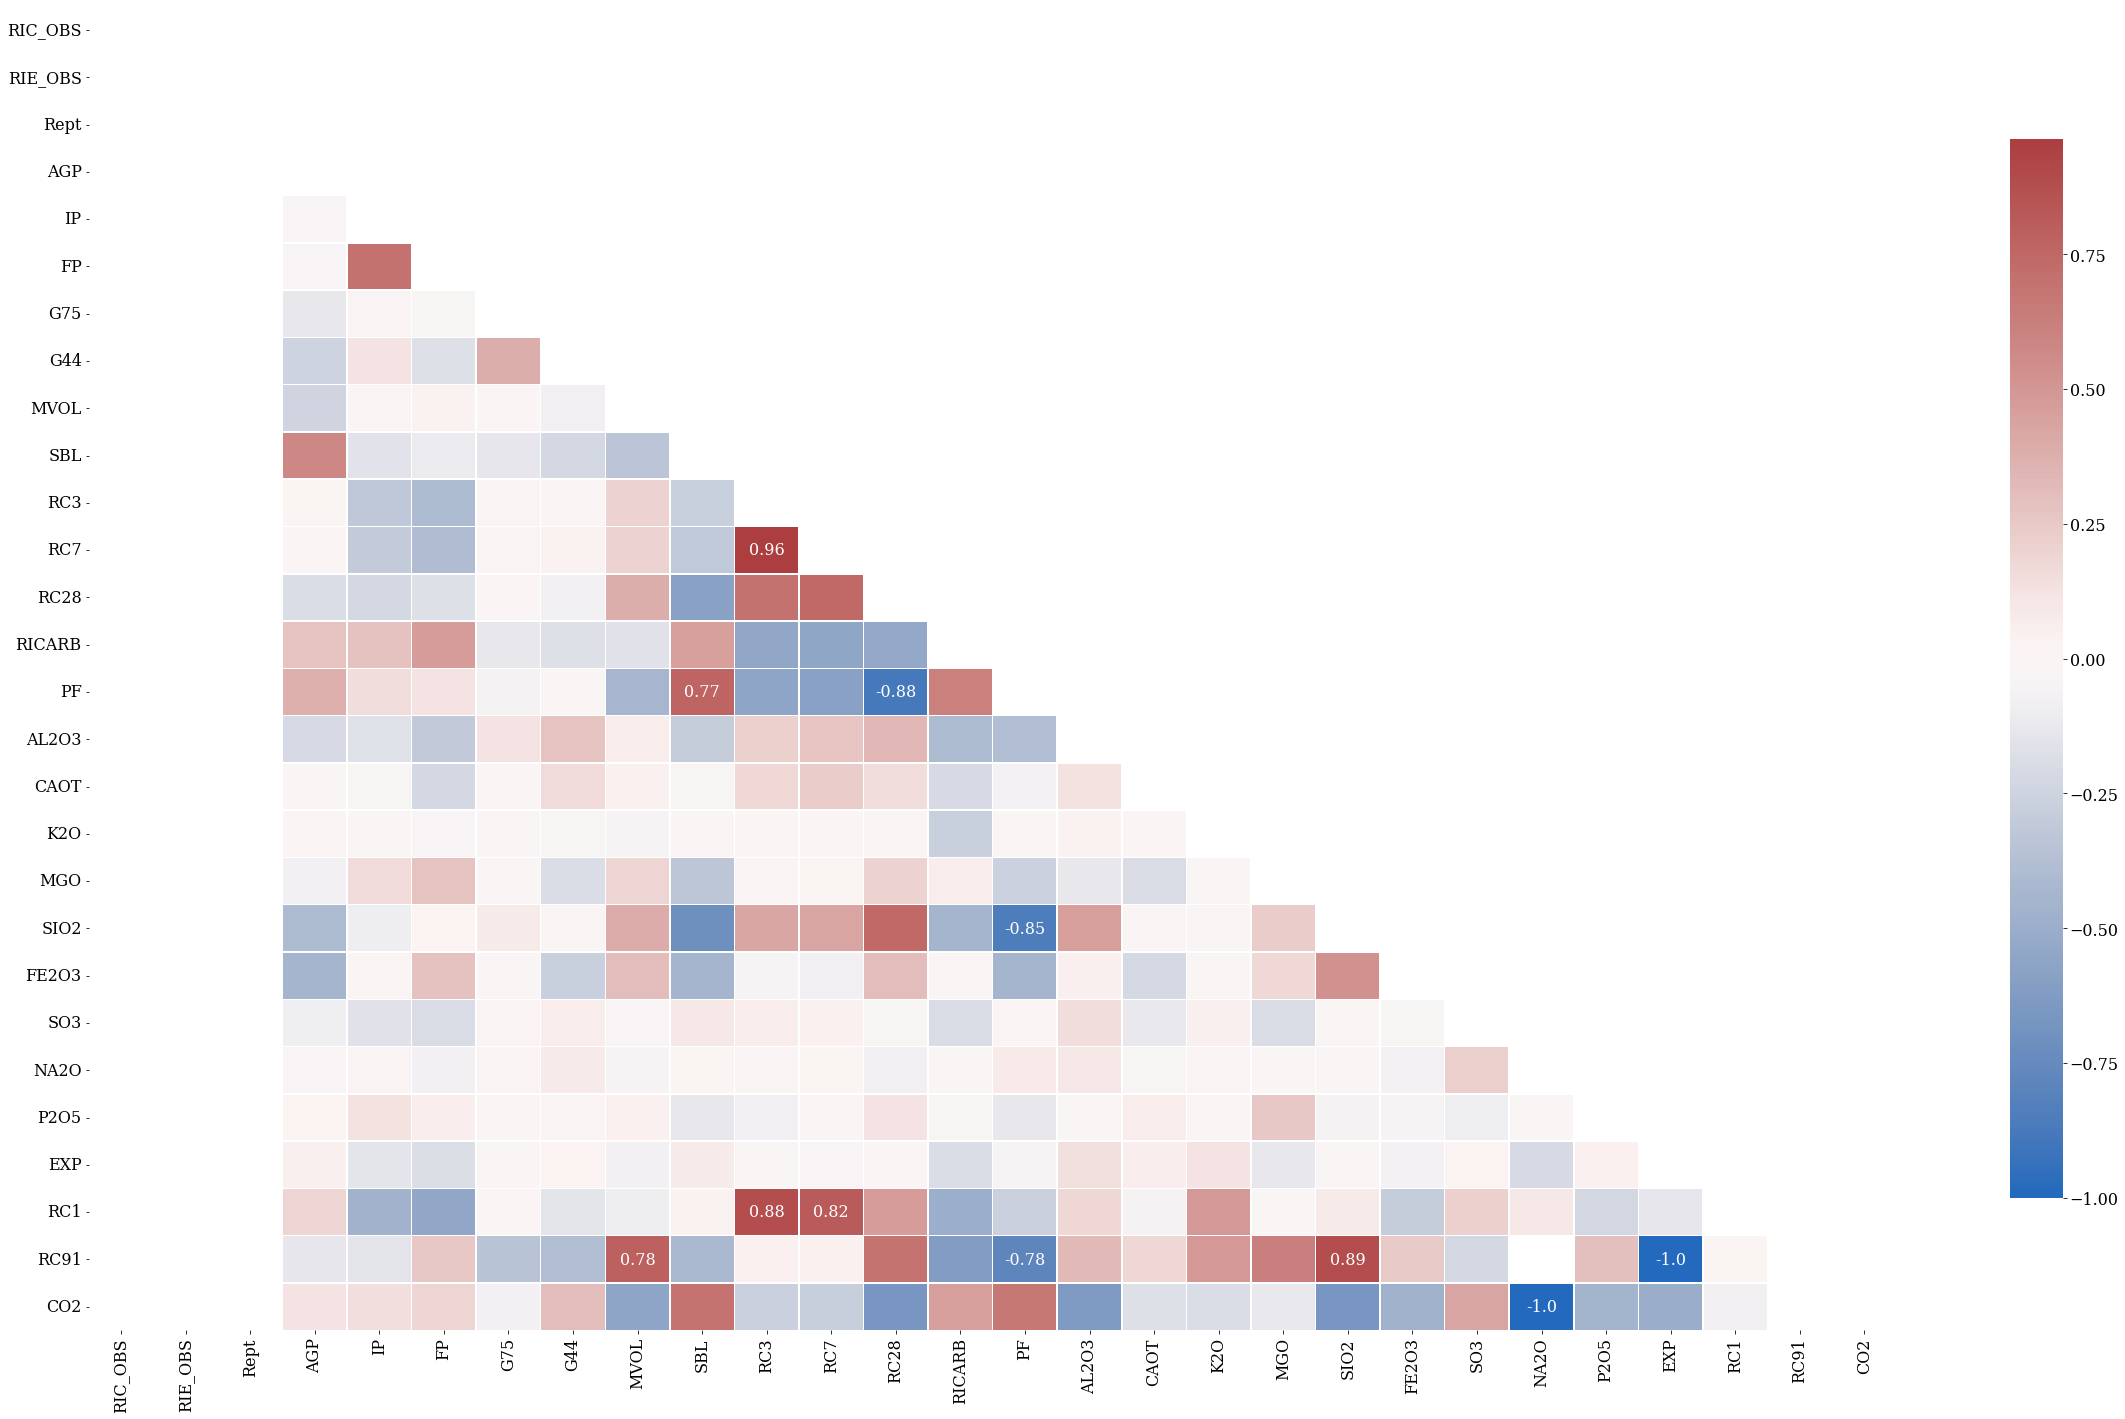

In [34]:
df_corr = df.corr(method="pearson")

labels = np.where(
    np.abs(df_corr) >= 0.75, np.round(df_corr[np.abs(df_corr) > 0.75], 2), ""
)

# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 20))

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [35]:
corr_matrix = df.corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

NA2O  CO2     1.000000
EXP   RC91    1.000000
RC3   RC7     0.964263
SIO2  RC91    0.885251
RC28  PF      0.882903
RC3   RC1     0.879935
PF    SIO2    0.852606
RC7   RC1     0.817311
MVOL  RC91    0.784773
PF    RC91    0.779864
SBL   PF      0.770979
RC7   RC28    0.745830
RC28  SIO2    0.743680
SBL   SIO2    0.710476
RC3   RC28    0.701637
dtype: float64

In [36]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

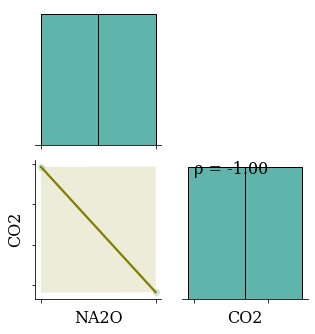

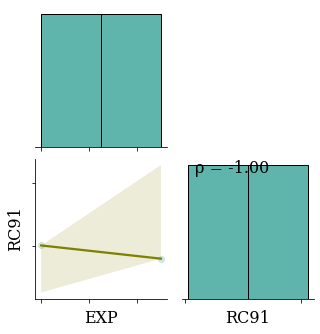

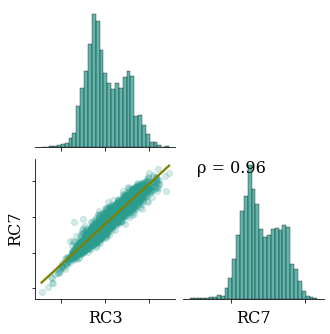

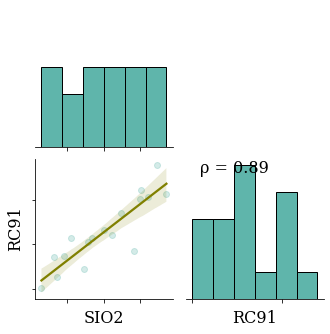

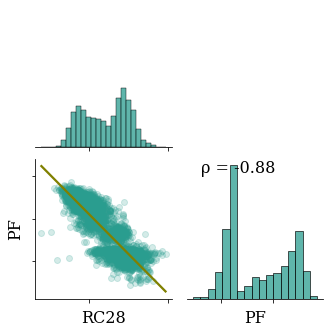

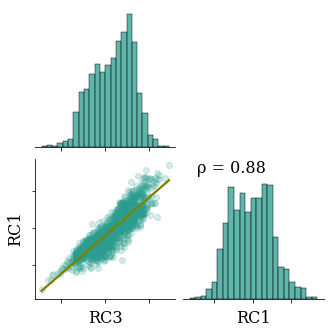

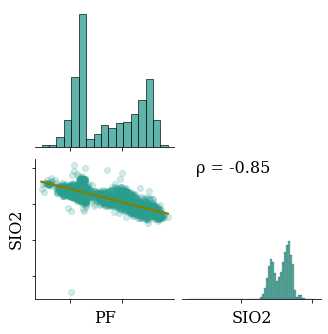

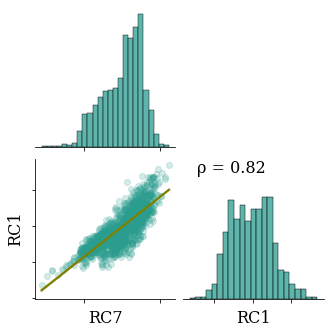

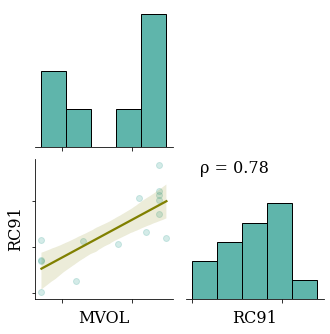

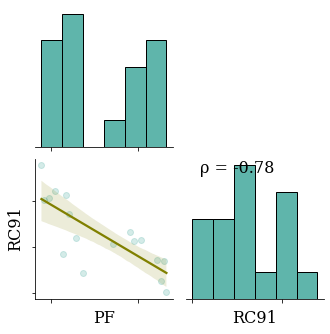

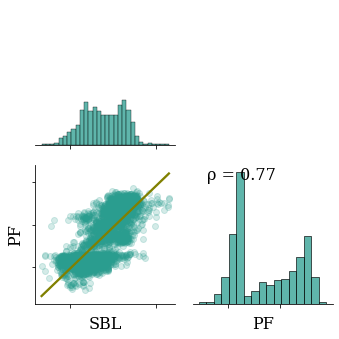

In [37]:
for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Data/Hora Variable Analyses

In [38]:
dates

0      2008-01-02
1      2008-01-02
2      2008-01-03
3      2008-01-03
4      2008-01-04
          ...    
3775   2019-07-19
3776   2019-07-23
3777   2019-07-25
3778   2019-07-27
3779   2019-07-30
Name: Data, Length: 3780, dtype: datetime64[ns]

In [39]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

2580 valid days out of 2614


In [40]:
# All years of data
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2016, 2017, 2018, 2019, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}


In [41]:
months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2016: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2017: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2018: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2019: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2008: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2009: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2010: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2011: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2012: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2013: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2014: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2015: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}}

In [42]:
days_each_month_per_year = {}
for year in years:
    for month in months_each_year[year]:
        days_each_month_per_year[str(year) + "-" + str(month)] = [
            date.day for date in dates if date.year == year and date.month == month
        ]

print("Days of available data for each month each year:")
days_each_month_per_year

Days of available data for each month each year:


{'2016-1': [4,
  5,
  6,
  7,
  8,
  11,
  12,
  13,
  14,
  15,
  18,
  19,
  20,
  21,
  22,
  25,
  26,
  27,
  28,
  29],
 '2016-2': [1,
  2,
  3,
  4,
  5,
  8,
  10,
  11,
  12,
  15,
  16,
  17,
  18,
  19,
  22,
  23,
  24,
  25,
  26,
  29],
 '2016-3': [1,
  2,
  3,
  4,
  7,
  8,
  9,
  10,
  11,
  14,
  15,
  16,
  17,
  18,
  21,
  22,
  23,
  24,
  28,
  29,
  30,
  31],
 '2016-4': [1,
  4,
  5,
  6,
  7,
  8,
  11,
  12,
  13,
  14,
  15,
  18,
  19,
  20,
  25,
  26,
  27,
  28,
  29],
 '2016-5': [2,
  3,
  4,
  5,
  6,
  9,
  10,
  11,
  12,
  13,
  16,
  17,
  18,
  19,
  20,
  23,
  24,
  25,
  27,
  30,
  31],
 '2016-6': [1,
  2,
  3,
  6,
  7,
  8,
  9,
  10,
  13,
  14,
  15,
  16,
  17,
  20,
  21,
  22,
  23,
  24,
  27,
  28,
  29,
  30],
 '2016-7': [1,
  4,
  5,
  6,
  7,
  8,
  11,
  12,
  13,
  14,
  15,
  18,
  19,
  20,
  21,
  22,
  25,
  26,
  27,
  28,
  29],
 '2016-8': [1,
  2,
  3,
  4,
  5,
  8,
  9,
  10,
  11,
  12,
  15,
  16,
  17,
  18,
  19,
  2

In [43]:
# count of days each month per year
count_of_days_each_month_per_year = {}

for year_month, days in days_each_month_per_year.items():
    count_of_days_each_month_per_year[year_month] = len(days)

print("Count of days each month per year:")
count_of_days_each_month_per_year

Count of days each month per year:


{'2016-1': 20,
 '2016-2': 20,
 '2016-3': 22,
 '2016-4': 19,
 '2016-5': 21,
 '2016-6': 22,
 '2016-7': 21,
 '2016-8': 23,
 '2016-9': 21,
 '2016-10': 20,
 '2016-11': 22,
 '2016-12': 22,
 '2017-1': 22,
 '2017-2': 18,
 '2017-3': 20,
 '2017-4': 10,
 '2017-5': 11,
 '2017-6': 11,
 '2017-7': 10,
 '2017-8': 12,
 '2017-9': 10,
 '2017-10': 9,
 '2017-11': 11,
 '2017-12': 9,
 '2018-1': 9,
 '2018-2': 9,
 '2018-3': 12,
 '2018-4': 9,
 '2018-5': 9,
 '2018-6': 11,
 '2018-7': 11,
 '2018-8': 11,
 '2018-9': 11,
 '2018-10': 9,
 '2018-11': 13,
 '2018-12': 10,
 '2019-1': 9,
 '2019-2': 6,
 '2019-3': 10,
 '2019-4': 9,
 '2019-5': 11,
 '2019-6': 13,
 '2019-7': 9,
 '2019-8': 4,
 '2019-9': 2,
 '2019-10': 3,
 '2019-11': 3,
 '2019-12': 2,
 '2008-1': 45,
 '2008-2': 40,
 '2008-3': 40,
 '2008-4': 34,
 '2008-5': 46,
 '2008-6': 51,
 '2008-7': 43,
 '2008-8': 51,
 '2008-9': 44,
 '2008-10': 50,
 '2008-11': 41,
 '2008-12': 40,
 '2009-1': 43,
 '2009-2': 40,
 '2009-3': 44,
 '2009-4': 42,
 '2009-5': 43,
 '2009-6': 45,
 '2009-7': 

In [44]:
max_obs_key = max(count_of_days_each_month_per_year, key=count_of_days_each_month_per_year.get)
max_obs_value = count_of_days_each_month_per_year[max_obs_key]
min_obs_key = min(count_of_days_each_month_per_year, key=count_of_days_each_month_per_year.get)
min_obs_value = count_of_days_each_month_per_year[min_obs_key]
print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2019-9 has the minimum number of days with samples - 2
2008-6 has the maximum number of days with samples - 51


In [45]:
mean_obs_per_year = {str(year) : 0 for year in years}

for year, value in count_of_days_each_month_per_year.items():
    mean_obs_per_year[year[:4]] += value

for year, value in months_each_year.items():
    mean_obs_per_year[str(year)] /= len(value)
    mean_obs_per_year[str(year)] = int(mean_obs_per_year[str(year)])
    
print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(np.mean(list(count_of_days_each_month_per_year.values()))))

Mean Number of observations - per year
{'2016': 21, '2017': 12, '2018': 10, '2019': 6, '2008': 43, '2009': 42, '2010': 43, '2011': 40, '2012': 31, '2013': 21, '2014': 21, '2015': 20}

Mean number of observations - all years
26


In [46]:
# Here we get the frequency of the whole time series

diffs = []

for i in range(1, len(dates)):
    diffs.append(dates[i] - dates[i-1])
diffs

[Timedelta('0 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('3 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedel

In [47]:
# Average Frequency
np.mean(diffs)

Timedelta('1 days 02:50:42.709711563')

In [48]:
Counter(diffs)

Counter({Timedelta('0 days 00:00:00'): 1165,
         Timedelta('1 days 00:00:00'): 1800,
         Timedelta('3 days 00:00:00'): 449,
         Timedelta('2 days 00:00:00'): 152,
         Timedelta('4 days 00:00:00'): 90,
         Timedelta('337 days 00:00:00'): 1,
         Timedelta('-334 days +00:00:00'): 1,
         Timedelta('5 days 00:00:00'): 16,
         Timedelta('7 days 00:00:00'): 2,
         Timedelta('6 days 00:00:00'): 3,
         Timedelta('-1 days +00:00:00'): 1,
         Timedelta('8 days 00:00:00'): 1,
         Timedelta('-2 days +00:00:00'): 1,
         Timedelta('96 days 00:00:00'): 1,
         Timedelta('122 days 00:00:00'): 9,
         Timedelta('61 days 00:00:00'): 30,
         Timedelta('-319 days +00:00:00'): 1,
         Timedelta('-28 days +00:00:00'): 1,
         Timedelta('120 days 00:00:00'): 4,
         Timedelta('62 days 00:00:00'): 3,
         Timedelta('-199 days +00:00:00'): 1,
         Timedelta('-24 days +00:00:00'): 1,
         Timedelta('-264 days +0

<AxesSubplot:xlabel='count'>

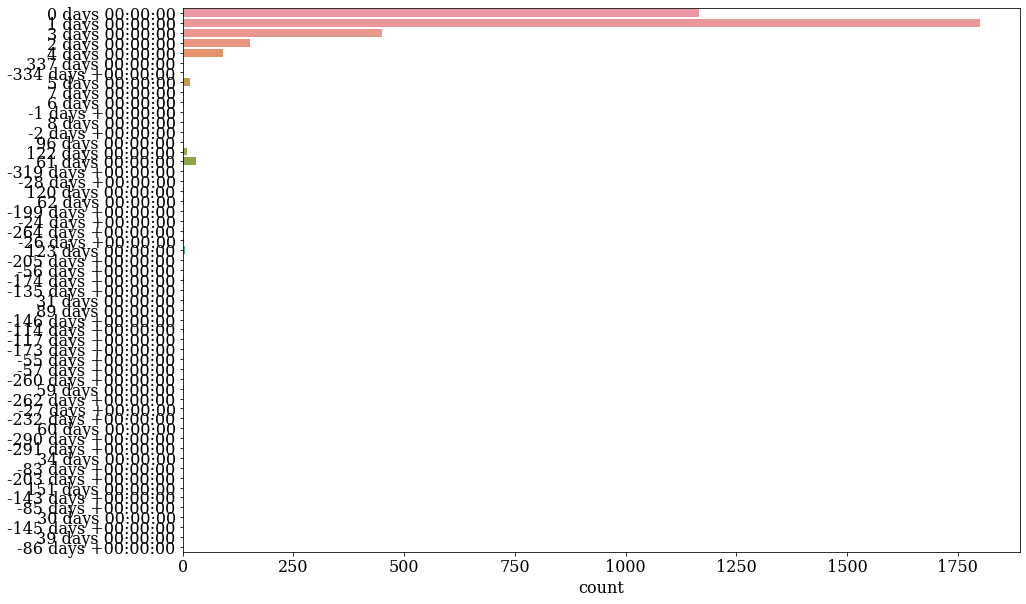

In [49]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y=diffs)

In [50]:
# Same thing but only with the dates

diffs = []

for i in range(1, len(dates)):
    diffs.append(dates[i].date() - dates[i-1].date())

In [51]:
# Average Frequency
np.mean(diffs)

datetime.timedelta(1, 10242, 709712)

In [52]:
Counter(diffs)

Counter({datetime.timedelta(0): 1165,
         datetime.timedelta(1): 1800,
         datetime.timedelta(3): 449,
         datetime.timedelta(2): 152,
         datetime.timedelta(4): 90,
         datetime.timedelta(337): 1,
         datetime.timedelta(-334): 1,
         datetime.timedelta(5): 16,
         datetime.timedelta(7): 2,
         datetime.timedelta(6): 3,
         datetime.timedelta(-1): 1,
         datetime.timedelta(8): 1,
         datetime.timedelta(-2): 1,
         datetime.timedelta(96): 1,
         datetime.timedelta(122): 9,
         datetime.timedelta(61): 30,
         datetime.timedelta(-319): 1,
         datetime.timedelta(-28): 1,
         datetime.timedelta(120): 4,
         datetime.timedelta(62): 3,
         datetime.timedelta(-199): 1,
         datetime.timedelta(-24): 1,
         datetime.timedelta(-264): 2,
         datetime.timedelta(-26): 2,
         datetime.timedelta(123): 6,
         datetime.timedelta(-205): 1,
         datetime.timedelta(-56): 1,
      

In [53]:
# percent of diffs
[round(val/df.shape[0] *100, 2) for val in list(Counter(diffs).values())]

[30.82,
 47.62,
 11.88,
 4.02,
 2.38,
 0.03,
 0.03,
 0.42,
 0.05,
 0.08,
 0.03,
 0.03,
 0.03,
 0.03,
 0.24,
 0.79,
 0.03,
 0.03,
 0.11,
 0.08,
 0.03,
 0.03,
 0.05,
 0.05,
 0.16,
 0.03,
 0.03,
 0.05,
 0.03,
 0.11,
 0.03,
 0.03,
 0.05,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.05,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03]

<AxesSubplot:xlabel='count'>

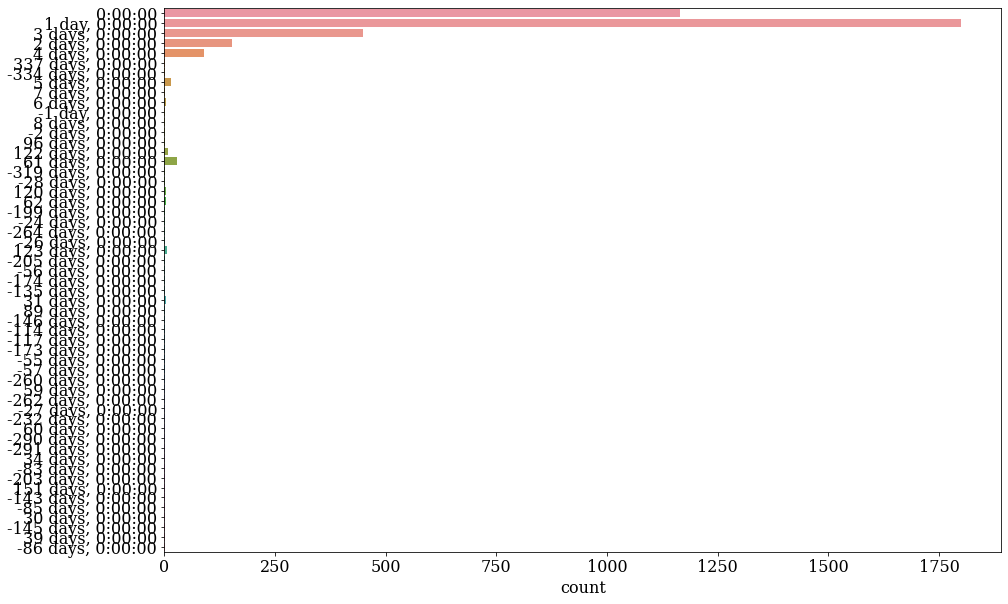

In [54]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y= diffs)

### Compressive Strength Distribution

#### 1 Days

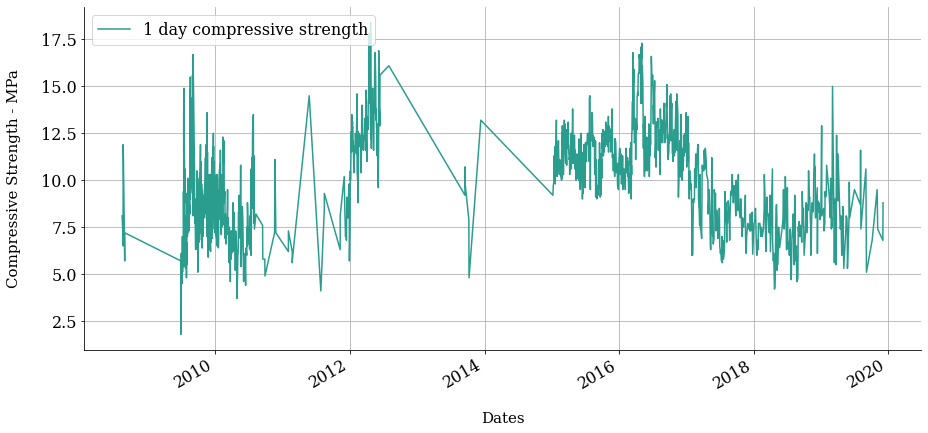

In [55]:
tmp = df[["Data", "RC1"]].dropna().copy()
tmp = tmp.set_index("Data")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#### 3 Days

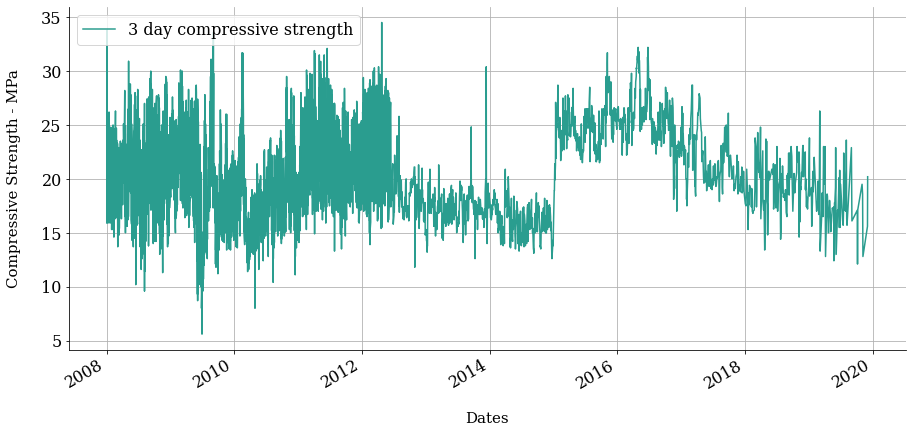

In [56]:
tmp = df[["Data", "RC3"]].dropna().copy()
tmp = tmp.set_index("Data")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

#### 7 Days

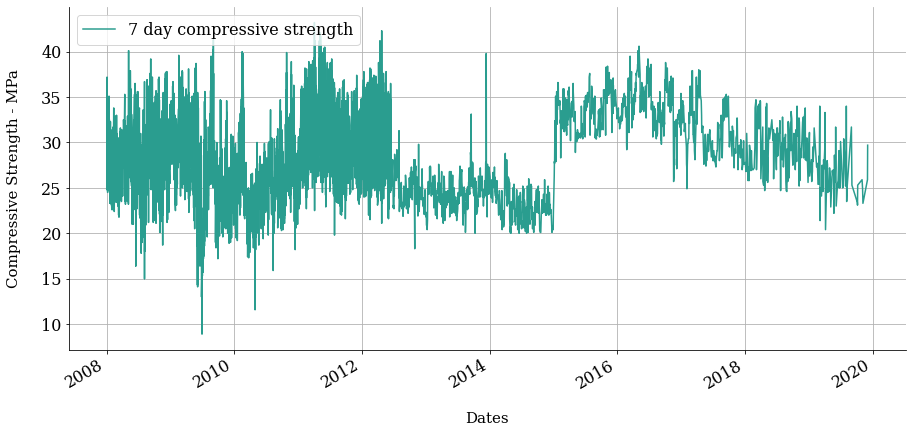

In [57]:
tmp = df[["Data", "RC7"]].dropna().copy()
tmp = tmp.set_index("Data")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

#### 28 Days

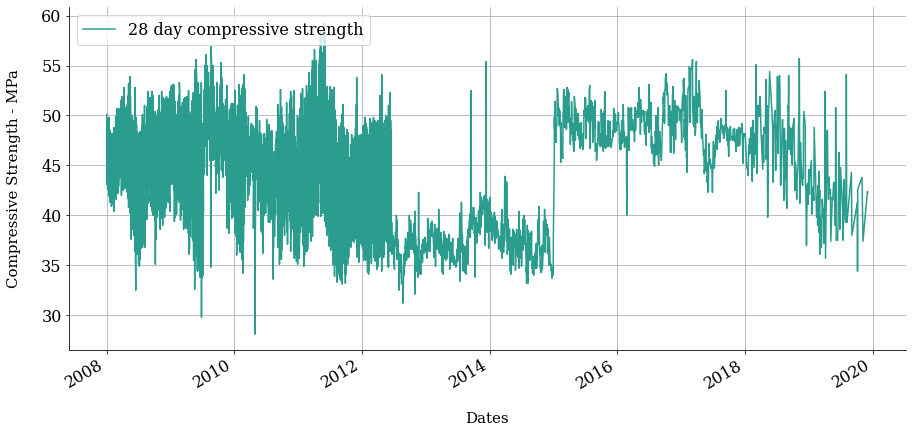

In [58]:
tmp = df[["Data", "RC28"]].dropna().copy()
tmp = tmp.set_index("Data")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()